In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA
from MDAnalysis.analysis import hydrogenbonds
import sys
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from rich import print as rprint
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from MDAnalysis.analysis.rdf import InterRDF
from MDAnalysis.analysis import msd
import json
from rich.progress import track

from scipy.stats import gaussian_kde
from copy import deepcopy

# 读取轨迹

In [ ]:
config_s = {
       "SPCE_qspcfw": {
          "fp_ncdf": "/home/iaw/DATA/ALP/bulk2/nvt-0.5fs/md20ps.ncdf"
        , "fp_top": "/home/iaw/DATA/ALP/bulk2/nvt-0.5fs/model.prmtop"
        , "start_frame": 0
        , "end_frame": 400000
        , "step": 1000
    }
    ,  "SPCE_spcfw": {
          "fp_ncdf": "/home/iaw/DATA2/wat_md/bulk_spce_flex_spcfw/nvt_200ps/md200ps.ncdf"
        , "fp_top": "/home/iaw/DATA2/wat_md/bulk_spce_flex_spcfw/nvt_200ps/model.prmtop"
        , "start_frame": 0
        , "end_frame": 400000
        , "step": 1000
    }
    ,  "OPC3POL": {
          "fp_ncdf": "/home/iaw/DATA2/wat_md/bulk_opc3pol_rigid/nvt_200ps/md200ps.ncdf"
        , "fp_top": "/home/iaw/DATA2/wat_md/bulk_opc3pol_rigid/nvt_200ps/model.prmtop"
        , "start_frame": 0
        , "end_frame": 400000
        , "step": 1000
    }
    ,  "TIP3P": {
          "fp_ncdf":"/home/iaw/DATA2/wat_md/bulk_tip3p_rigid/216/5_nvt_200ps/md200ps.ncdf"
        , "fp_top": "/home/iaw/DATA2/wat_md/bulk_tip3p_rigid/216/5_nvt_200ps/model.prmtop"
        , "start_frame": 0
        , "end_frame": 400000
        , "step": 1000
    }               /home/iaw/DATA2/wat_md/bulk_spce_rigid/nvt_200ps/
    ,  "SPCE": {
          "fp_ncdf":"/home/iaw/DATA2/wat_md/bulk_spce_rigid/nvt_200ps/md200ps.ncdf"
        , "fp_top": "/home/iaw/DATA2/wat_md/bulk_spce_rigid/nvt_200ps/model.prmtop"
        , "start_frame": 0
        , "end_frame": 400000
        , "step": 1000
    }
}

In [ ]:
result_s = deepcopy(config_s)
for k in track(config_s.keys()):
    i_trial = config_s[k]
    fp_ncdf = i_trial["fp_ncdf"]
    fp_top = i_trial["fp_top"]

    i_u = u = mda.Universe(fp_top
                           ,fp_ncdf
                           , dt = 0.0005, format= "NCDF"
                           , topology_format="PRMTOP")

    bulk_wat_O_sele = "type OW"
    bulk_O_wat = i_u.select_atoms(bulk_wat_O_sele, updating=False)
    rdf_O = InterRDF(g1=bulk_O_wat, g2=bulk_O_wat, nbins=100, range=[0,15], norm="rdf",exclude_same="residue", verbose = True)
    rdf_O.run(start = i_trial["start_frame"], stop = i_trial["end_frame"], step = i_trial["step"])
    result_s[k]["result_OO"] = rdf_O

    bulk_wat_H_sele = "type HW"
    bulk_H_wat = i_u.select_atoms(bulk_wat_H_sele, updating=False)
    rdf_H = InterRDF(g1=bulk_H_wat, g2=bulk_H_wat, nbins=100, range=[0,15], norm="rdf",exclude_same="residue", verbose = True)
    rdf_H.run(start = i_trial["start_frame"], stop = i_trial["end_frame"], step = i_trial["step"])
    result_s[k]["result_HH"] = rdf_H

In [9]:
config_s["SPCE"]["fp_top"] ="/home/iaw/DATA2/wat_md/bulk_spce_rigid/nvt_200ps/model.prmtop"
result_s["SPCE"]["fp_top"] ="/home/iaw/DATA2/wat_md/bulk_spce_rigid/nvt_200ps/model.prmtop"

In [10]:
k = "SPCE"
i_trial = config_s[k]
fp_ncdf = i_trial["fp_ncdf"]
fp_top = i_trial["fp_top"]
i_u = u = mda.Universe(fp_top
                       ,fp_ncdf
                       , dt = 0.0005, format= "NCDF"
                       , topology_format="PRMTOP")
bulk_wat_O_sele = "type OW"
bulk_O_wat = i_u.select_atoms(bulk_wat_O_sele, updating=False)
rdf_O = InterRDF(g1=bulk_O_wat, g2=bulk_O_wat, nbins=100, range=[0,15], norm="rdf",exclude_same="residue", verbose = True)
rdf_O.run(start = i_trial["start_frame"], stop = i_trial["end_frame"], step = i_trial["step"])
result_s[k]["result_OO"] = rdf_O
bulk_wat_H_sele = "type HW"
bulk_H_wat = i_u.select_atoms(bulk_wat_H_sele, updating=False)
rdf_H = InterRDF(g1=bulk_H_wat, g2=bulk_H_wat, nbins=100, range=[0,15], norm="rdf",exclude_same="residue", verbose = True)
rdf_H.run(start = i_trial["start_frame"], stop = i_trial["end_frame"], step = i_trial["step"])
result_s[k]["result_HH"] = rdf_H

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

In [19]:
result_s

{'SPCE_qspcfw': {'fp_ncdf': '/home/iaw/DATA/ALP/bulk2/nvt-0.5fs/md20ps.ncdf',
  'fp_top': '/home/iaw/DATA/ALP/bulk2/nvt-0.5fs/model.prmtop',
  'start_frame': 0,
  'end_frame': 400000,
  'step': 1000,
  'result_OO': <MDAnalysis.analysis.rdf.InterRDF at 0x7f4144c2e250>,
  'result_HH': <MDAnalysis.analysis.rdf.InterRDF at 0x7f4135447670>},
 'SPCE_spcfw': {'fp_ncdf': '/home/iaw/DATA2/wat_md/bulk_spce_flex_spcfw/nvt_200ps/md200ps.ncdf',
  'fp_top': '/home/iaw/DATA2/wat_md/bulk_spce_flex_spcfw/nvt_200ps/model.prmtop',
  'start_frame': 0,
  'end_frame': 400000,
  'step': 1000,
  'result_OO': <MDAnalysis.analysis.rdf.InterRDF at 0x7f4134bc5b20>,
  'result_HH': <MDAnalysis.analysis.rdf.InterRDF at 0x7f4134a70640>},
 'OPC3POL': {'fp_ncdf': '/home/iaw/DATA2/wat_md/bulk_opc3pol_rigid/nvt_200ps/md200ps.ncdf',
  'fp_top': '/home/iaw/DATA2/wat_md/bulk_opc3pol_rigid/nvt_200ps/model.prmtop',
  'start_frame': 0,
  'end_frame': 400000,
  'step': 1000,
  'result_OO': <MDAnalysis.analysis.rdf.InterRDF at 0

## gr
- O and O
- H and H

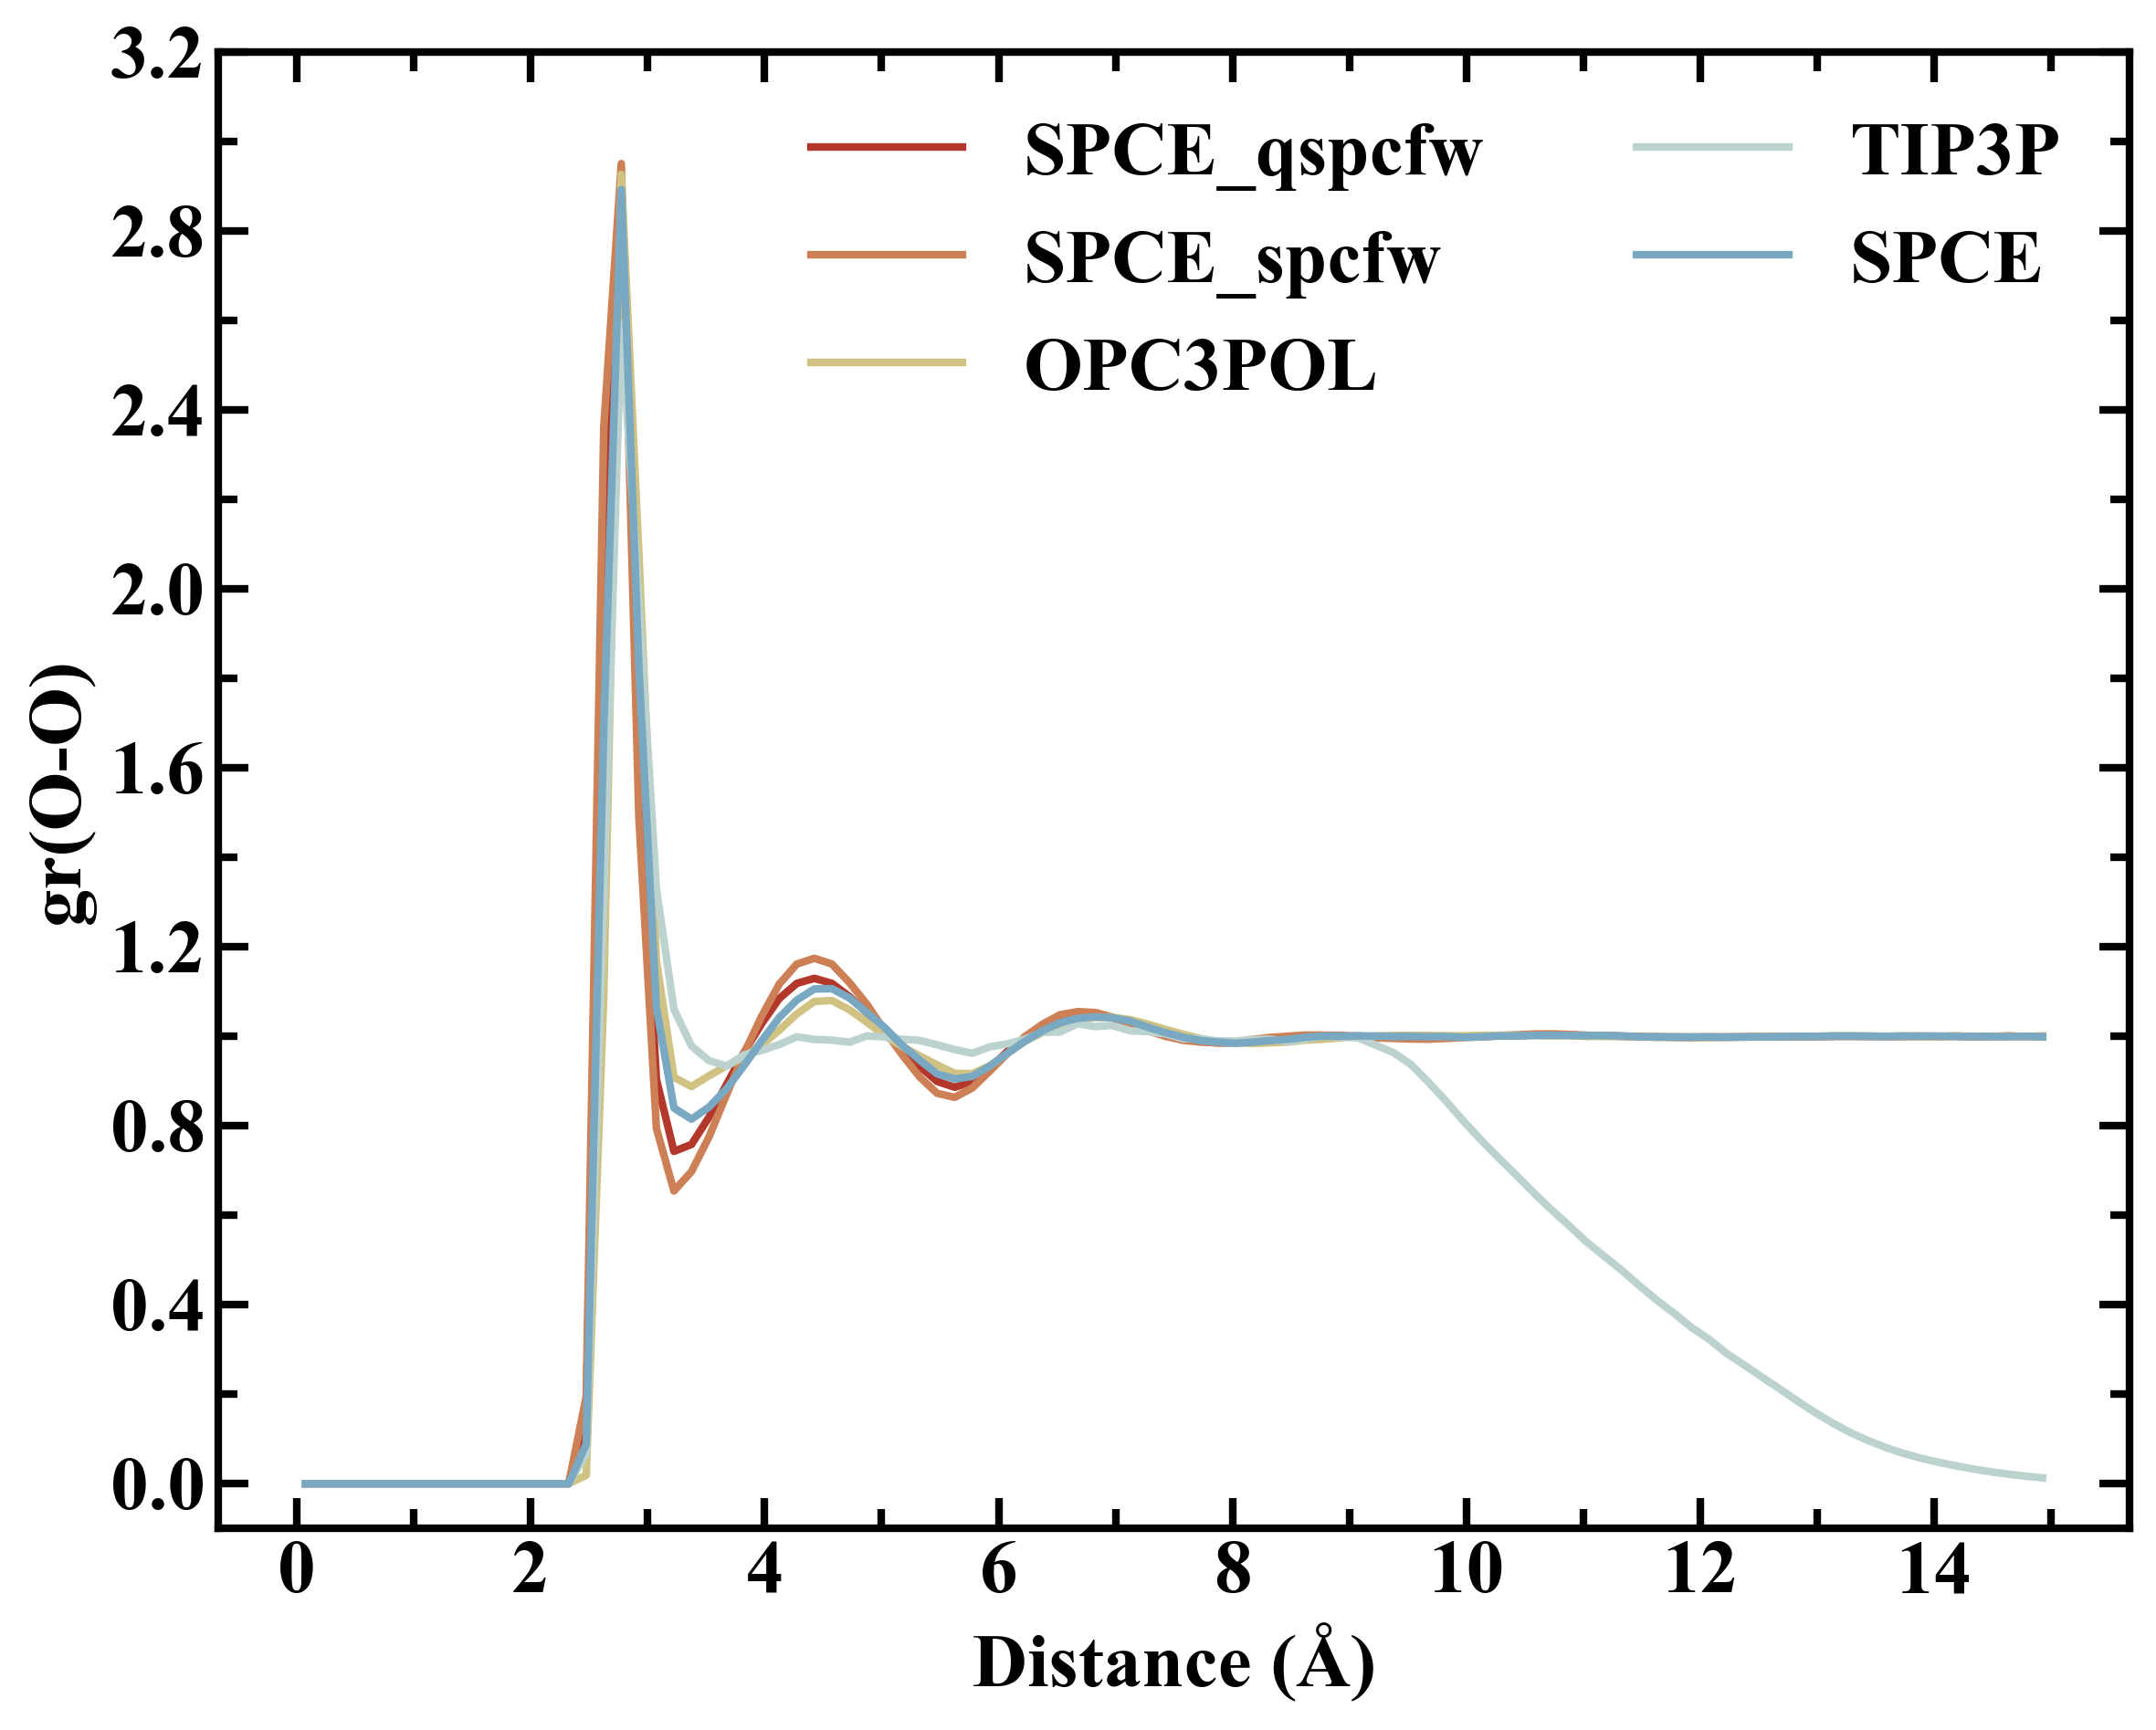

In [35]:

fig = plt.figure(figsize=(9,7), dpi=300)

plt.rcParams["axes.labelweight"] ="bold" 
plt.rcParams["font.family"]="Times New Roman" 
plt.rcParams["font.weight"]="bold" 
plt.rcParams["font.size"]=20
plt.rcParams["mathtext.default"]="regular"


ax1= plt.gca()

#ax1.spines['bottom'].set_position(('data',0))
ax1.spines['left'].set_position(('axes',0))
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)

ax1.tick_params(which='major'          # 设置对主刻度和次刻度生效
                ,bottom=True           # 底部坐标轴
                ,top=True
                ,left=True             # 左侧坐标轴
                ,right=True
                ,direction='in'       # 设置刻度线方向，'in' 表示朝内
                ,width=2               # 设置刻度线粗细
                ,length=8              # 设置长短
                ,labelsize=20
                )
ax1.tick_params(which='minor'          # 设置对主刻度和次刻度生效
                ,bottom=True           # 底部坐标轴
                ,top=True
                ,left=True             # 左侧坐标轴
                ,right=True
                ,direction='in'       # 设置刻度线方向，'in' 表示朝内
                ,width=2               # 设置刻度线粗细
                ,length=5              # 设置长短
                ,labelsize=20
                )
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.4))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.2))

ax1.set_xlabel("Distance (Å)")
ax1.set_ylabel("gr(O-O)")
ax1.set_ylim([-0.1, 3.2])
c_s = ["#b4372c", "#cd8056", "#cfc282", "#bbd2cf", "#78a8c2", "#406d9c"]

plt.plot(result_s["SPCE_qspcfw"]["result_OO"].results.bins, result_s["SPCE_qspcfw"]["result_OO"].results.rdf, alpha = 1,linewidth=2,color=c_s[0], linestyle = "-", label = "SPCE_qspcfw")
plt.plot(result_s["SPCE_spcfw"]["result_OO"].results.bins, result_s["SPCE_spcfw"]["result_OO"].results.rdf, alpha = 1,linewidth=2,color=c_s[1], linestyle = "-", label = "SPCE_spcfw")
plt.plot(result_s["OPC3POL"]["result_OO"].results.bins, result_s["OPC3POL"]["result_OO"].results.rdf, alpha = 1,linewidth=2,color=c_s[2], linestyle = "-", label = "OPC3POL")
plt.plot(result_s["TIP3P"]["result_OO"].results.bins, result_s["TIP3P"]["result_OO"].results.rdf, alpha = 1,linewidth=2,color=c_s[3], linestyle = "-", label = "TIP3P")
plt.plot(result_s["SPCE"]["result_OO"].results.bins, result_s["SPCE"]["result_OO"].results.rdf, alpha = 1,linewidth=2,color=c_s[4], linestyle = "-", label = "SPCE")


plt.legend(frameon=False, ncol=2)

plt.savefig("./fig/OO.png")

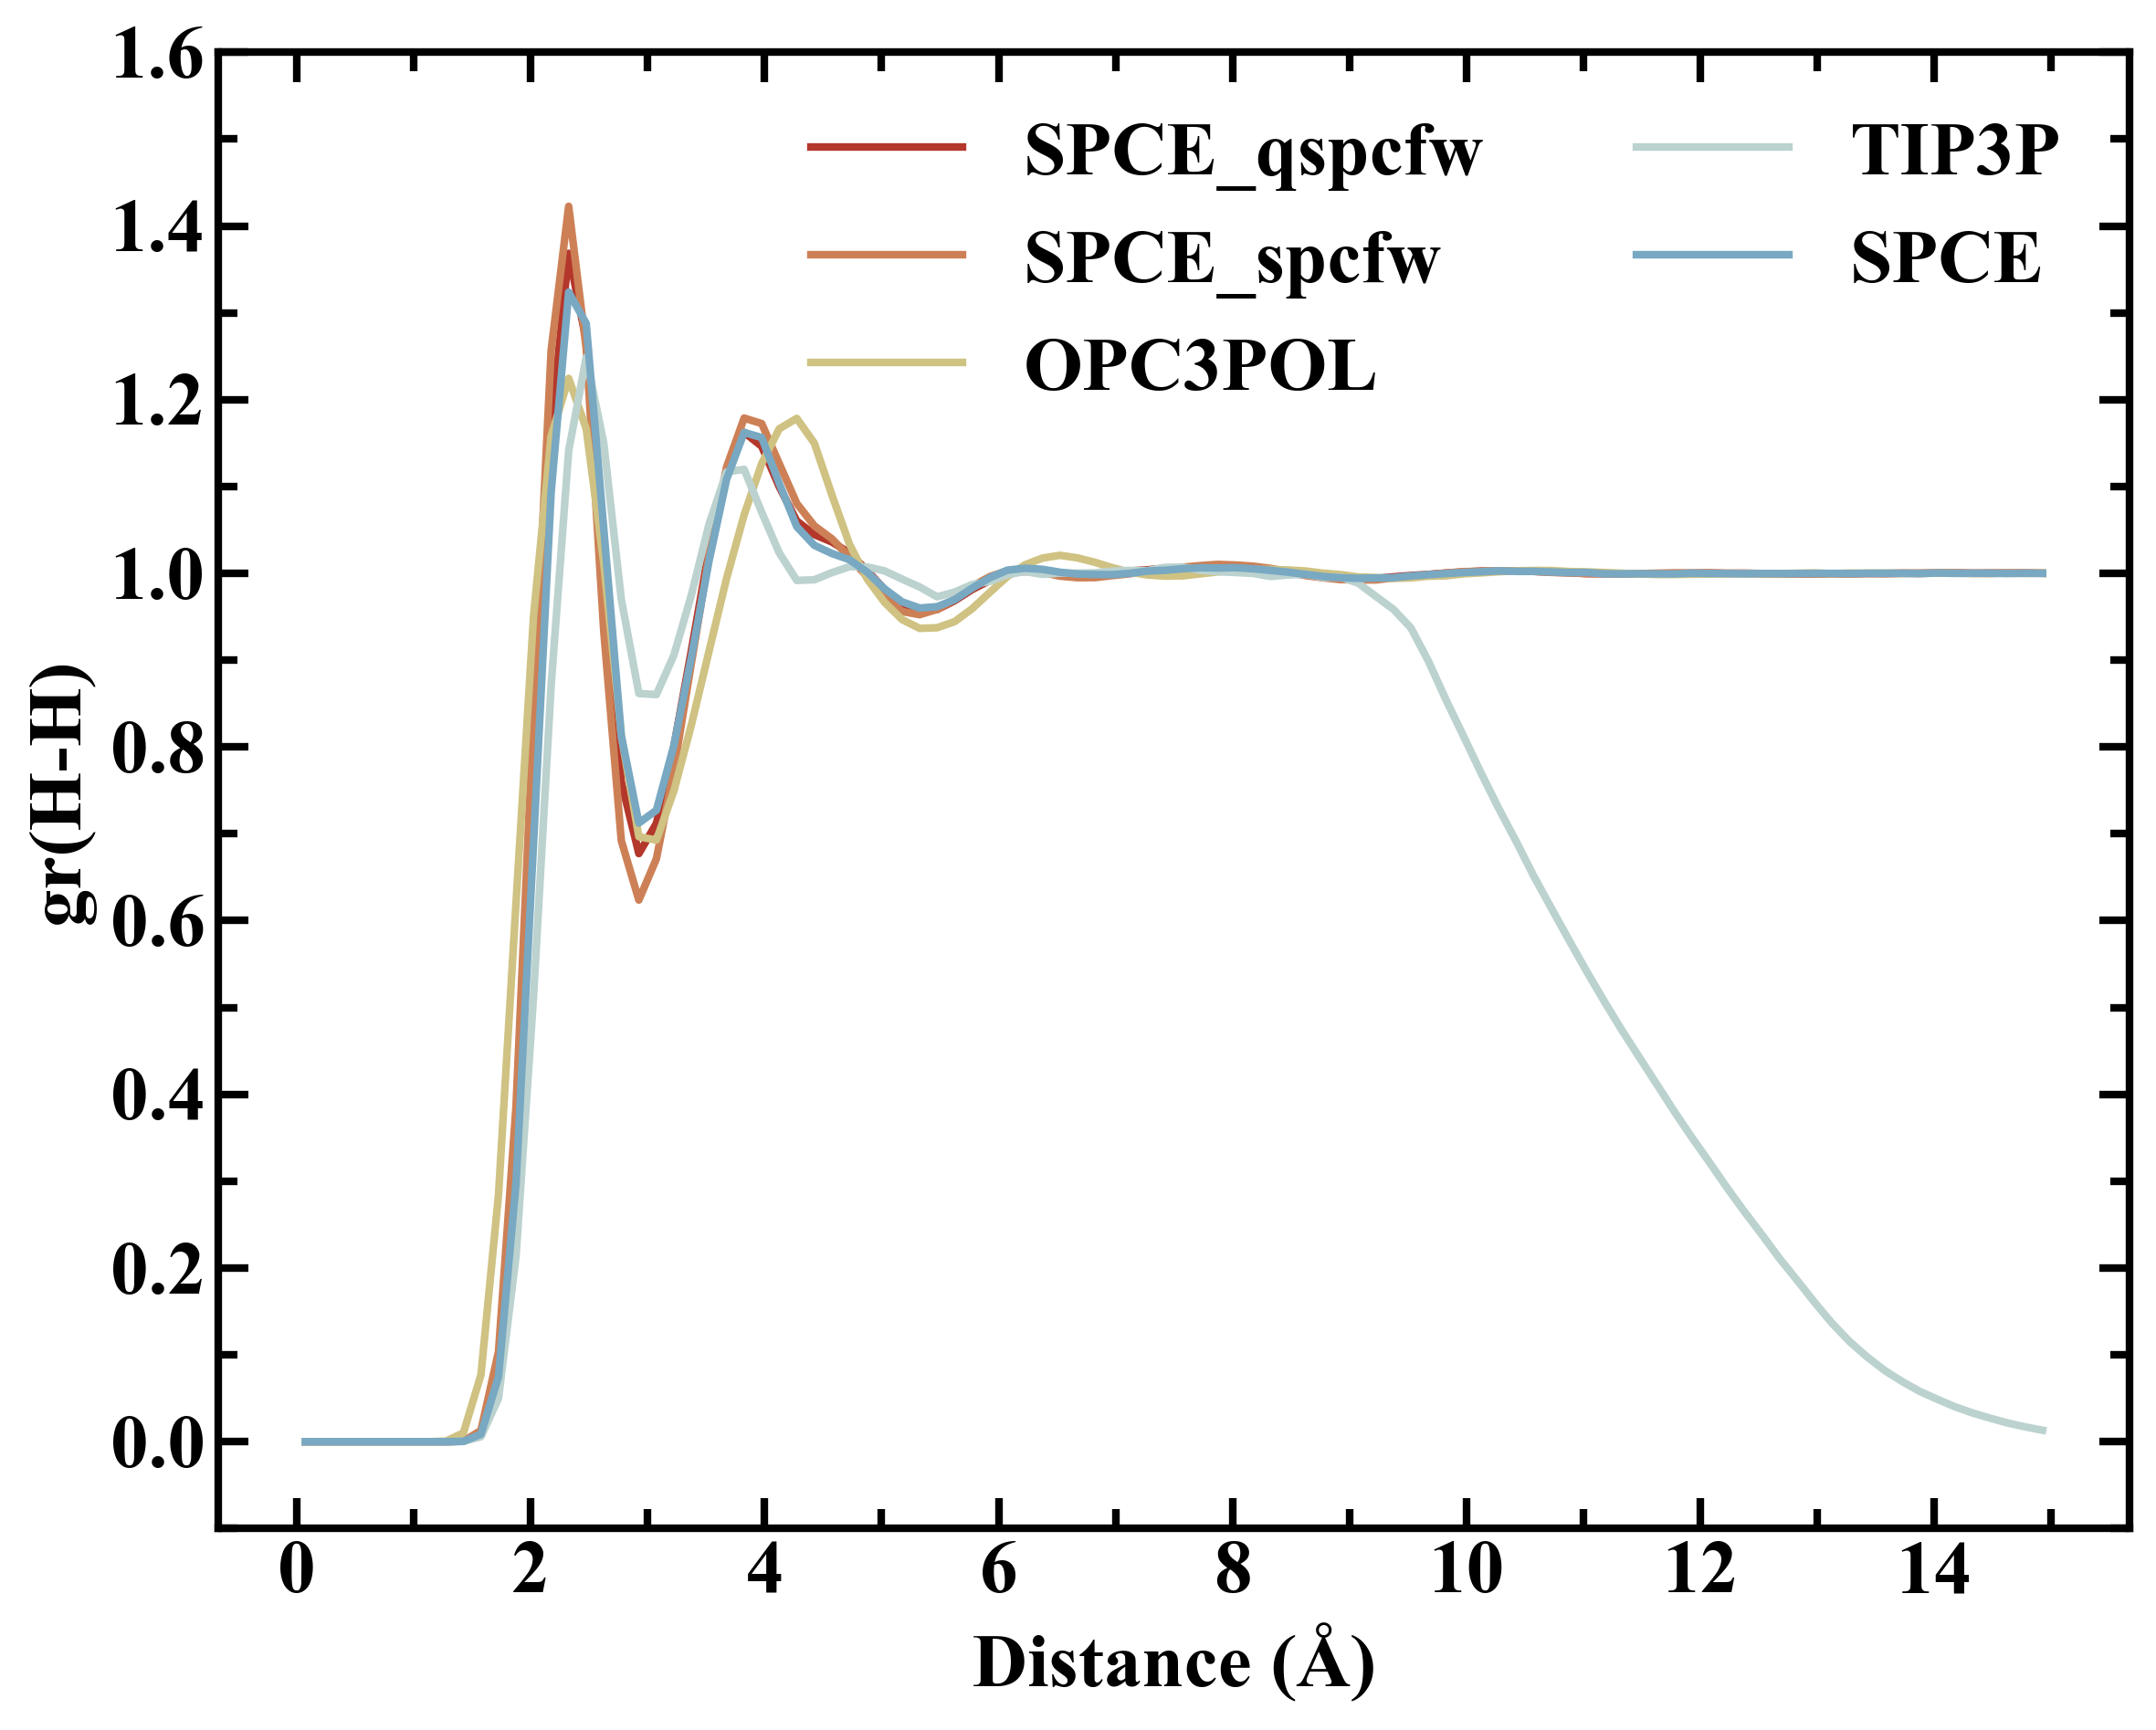

In [34]:

fig = plt.figure(figsize=(9,7), dpi=300)

plt.rcParams["axes.labelweight"] ="bold" 
plt.rcParams["font.family"]="Times New Roman" 
plt.rcParams["font.weight"]="bold" 
plt.rcParams["font.size"]=20
plt.rcParams["mathtext.default"]="regular"


ax1= plt.gca()

#ax1.spines['bottom'].set_position(('data',0))
ax1.spines['left'].set_position(('axes',0))
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)

ax1.tick_params(which='major'          # 设置对主刻度和次刻度生效
                ,bottom=True           # 底部坐标轴
                ,top=True
                ,left=True             # 左侧坐标轴
                ,right=True
                ,direction='in'       # 设置刻度线方向，'in' 表示朝内
                ,width=2               # 设置刻度线粗细
                ,length=8              # 设置长短
                ,labelsize=20
                )
ax1.tick_params(which='minor'          # 设置对主刻度和次刻度生效
                ,bottom=True           # 底部坐标轴
                ,top=True
                ,left=True             # 左侧坐标轴
                ,right=True
                ,direction='in'       # 设置刻度线方向，'in' 表示朝内
                ,width=2               # 设置刻度线粗细
                ,length=5              # 设置长短
                ,labelsize=20
                )
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

ax1.set_xlabel("Distance (Å)")
ax1.set_ylabel("gr(H-H)")
ax1.set_ylim([-0.1, 1.6])
c_s = ["#b4372c", "#cd8056", "#cfc282", "#bbd2cf", "#78a8c2", "#406d9c"]

plt.plot(result_s["SPCE_qspcfw"]["result_HH"].results.bins, result_s["SPCE_qspcfw"]["result_HH"].results.rdf, alpha = 1,linewidth=2,color=c_s[0], linestyle = "-", label = "SPCE_qspcfw")
plt.plot(result_s["SPCE_spcfw"]["result_HH"].results.bins, result_s["SPCE_spcfw"]["result_HH"].results.rdf, alpha = 1,linewidth=2,color=c_s[1], linestyle = "-", label = "SPCE_spcfw")
plt.plot(result_s["OPC3POL"]["result_HH"].results.bins, result_s["OPC3POL"]["result_HH"].results.rdf, alpha = 1,linewidth=2,color=c_s[2], linestyle = "-", label = "OPC3POL")
plt.plot(result_s["TIP3P"]["result_HH"].results.bins, result_s["TIP3P"]["result_HH"].results.rdf, alpha = 1,linewidth=2,color=c_s[3], linestyle = "-", label = "TIP3P")
plt.plot(result_s["SPCE"]["result_HH"].results.bins, result_s["SPCE"]["result_HH"].results.rdf, alpha = 1,linewidth=2,color=c_s[4], linestyle = "-", label = "SPCE")


plt.legend(frameon=False, ncol=2)

plt.savefig("./fig/HH.png")